<a href="https://colab.research.google.com/github/NikitaPoly/Sine_Predictor_NN/blob/master/SinePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tensor flow libraries and dependensies
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import math

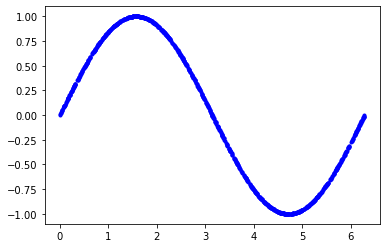

In [ ]:
#generate a random sine dataset
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=0,high=2*math.pi,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values,"b.")
plt.show()

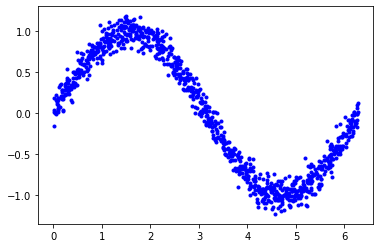

In [ ]:
#randomize the data to make it more realistic
y_values += 0.1 * np.random.randn(*y_values.shape)
plt.plot(x_values,y_values,"b.")
plt.show()

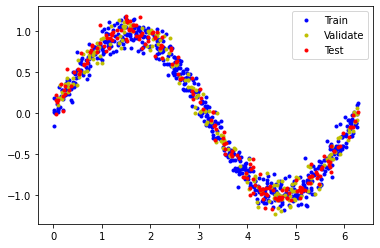

In [ ]:
#split the data into three catecogieries
TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2 *SAMPLES + TRAIN_SPLIT)
x_train, x_validation,x_test = np.split(x_values, [TRAIN_SPLIT,TEST_SPLIT])
y_train, y_validation,y_test = np.split(y_values, [TRAIN_SPLIT,TEST_SPLIT])
assert(x_train.size + x_validation.size + x_test.size) == SAMPLES
plt.plot(x_train,y_train,"b.",label="Train")
plt.plot(x_validation,y_validation,"y.",label="Validate")
plt.plot(x_test,y_test,"r.",label="Test")
plt.legend()
plt.show()


In [ ]:
#build a model
model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16,activation="relu",input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history_1 = model_1.fit(x_train,y_train,epochs=1000,batch_size=16,validation_data= (x_validation,y_validation))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 1s 1ms/sample - loss: 0.7887 - mae: 0.7848 - val_loss: 0.5824 - val_mae: 0.6867
Epoch 2/1000
600/600 [==============================] - 0s 185us/sample - loss: 0.4883 - mae: 0.6194 - val_loss: 0.4742 - val_mae: 0.6056
Epoch 3/1000
600/600 [==============================] - 0s 265us/sample - loss: 0.4208 - mae: 0.5637 - val_loss: 0.4259 - val_mae: 0.5631
Epoch 4/1000
600/600 [==============================] - 0s 471us/sample - loss: 0.3822 - mae: 0.5367 - val_loss: 0.3861 - val_mae: 0.5356
Epoch 5/1000
600/600 [==============================] - 0s 382us/sample - loss: 0.3472 - mae: 0.5115 - val_loss: 0.3512 - val_mae: 0.5097
Epoch 6/1000
600/600 [==============================] - 0s 324us/sample - loss: 0.3173 - mae: 0.4885 - val_loss: 0.3196 - val_mae: 0.4852
Epoch 7/1000
600/600 [==============================] - 0s 165us/sample - loss: 0.2891 - mae: 0.4684 - val_loss: 0.2935 - val_ma

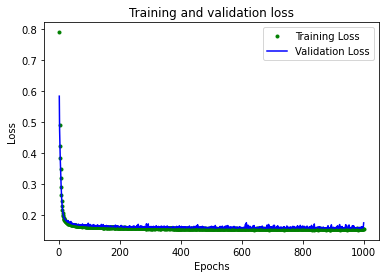

In [ ]:
#plot more data about our trained model
loss= history_1.history["loss"]
val_loss = history_1.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,"g.",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

[]

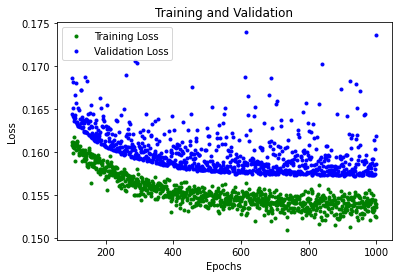

In [ ]:
#plot the loss but on a smaller scale
SKIP = 100
plt.plot(epochs[SKIP:],loss[SKIP:],"g.",label="Training Loss")
plt.plot(epochs[SKIP:],val_loss[SKIP:],"b.",label="Validation Loss")
plt.title("Training and Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.plot()

[]

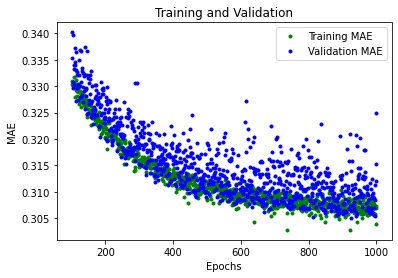

In [ ]:
#plot MAE. MAE is Mean Absolute Error. avrage difference between predictions and expected.
mae = history_1.history["mae"]
val_mae = history_1.history["val_mae"]
plt.plot(epochs[SKIP:],mae[SKIP:],"g.",label="Training MAE")
plt.plot(epochs[SKIP:],val_mae[SKIP:],"b.",label="Validation MAE")
plt.title("Training and Validation")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.plot()

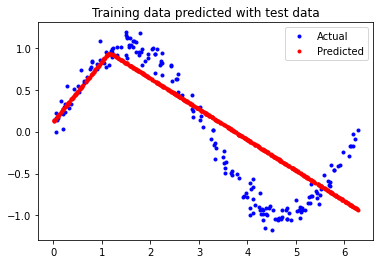

In [ ]:
#graph the actual vs model_1 predicted.
predictions = model_1.predict(x_train)
plt.clf()
plt.title("Training data predicted with test data")
plt.plot(x_test,y_test,"b.",label="Actual")
plt.plot(x_train,predictions,"r.",label="Predicted")
plt.legend()
plt.show()

In [ ]:
#Create a more complex model
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16,activation="relu",input_shape=(1,)))
model_2.add(layers.Dense(16,activation="relu"))
model_2.add(layers.Dense(1))
model_2.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train model
history_2 = model_2.fit(x_train,y_train,epochs=600,batch_size=16,validation_data= (x_validation,y_validation))

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 1s 1ms/sample - loss: 0.6993 - mae: 0.7257 - val_loss: 0.4758 - val_mae: 0.6040
Epoch 2/600
600/600 [==============================] - 0s 174us/sample - loss: 0.4000 - mae: 0.5489 - val_loss: 0.3766 - val_mae: 0.5306
Epoch 3/600
600/600 [==============================] - 0s 188us/sample - loss: 0.3225 - mae: 0.4913 - val_loss: 0.3078 - val_mae: 0.4715
Epoch 4/600
600/600 [==============================] - 0s 176us/sample - loss: 0.2664 - mae: 0.4482 - val_loss: 0.2561 - val_mae: 0.4314
Epoch 5/600
600/600 [==============================] - 0s 164us/sample - loss: 0.2206 - mae: 0.4084 - val_loss: 0.2094 - val_mae: 0.3941
Epoch 6/600
600/600 [==============================] - 0s 179us/sample - loss: 0.1883 - mae: 0.3798 - val_loss: 0.1816 - val_mae: 0.3689
Epoch 7/600
600/600 [==============================] - 0s 190us/sample - loss: 0.1666 - mae: 0.3571 - val_loss: 0.1709 - val_mae: 0.35

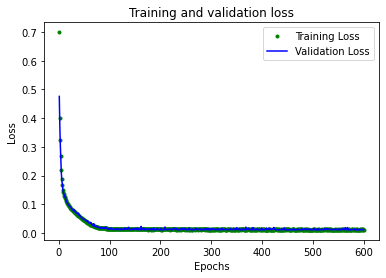

In [ ]:
#graph loss of model_2
loss= history_2.history["loss"]
val_loss = history_2.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,"g.",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

[]

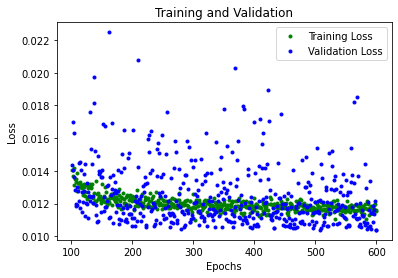

In [ ]:
#graph closer loss of model_2
SKIP = 100
plt.plot(epochs[SKIP:],loss[SKIP:],"g.",label="Training Loss")
plt.plot(epochs[SKIP:],val_loss[SKIP:],"b.",label="Validation Loss")
plt.title("Training and Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.plot()

[]

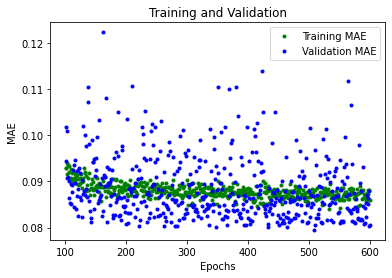

In [ ]:
#graph the avrage difference between prediction and actual
mae = history_2.history["mae"]
val_mae = history_2.history["val_mae"]
plt.plot(epochs[SKIP:],mae[SKIP:],"g.",label="Training MAE")
plt.plot(epochs[SKIP:],val_mae[SKIP:],"b.",label="Validation MAE")
plt.title("Training and Validation")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.plot()

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

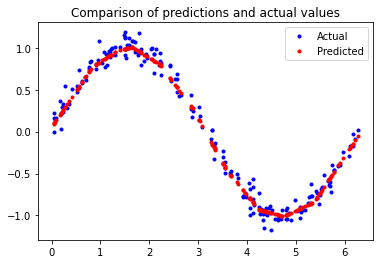

In [ ]:
#graph predicted vs actual
loss = model_2.evaluate(x_test,y_test)
predictions = model_2.predict(x_test)
plt.clf()
plt.title("Comparison of predictions and actual values")
plt.plot(x_test,y_test,"b.",label="Actual")
plt.plot(x_test,predictions,"r.",label="Predicted")
plt.legend()
plt.show()

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

2512

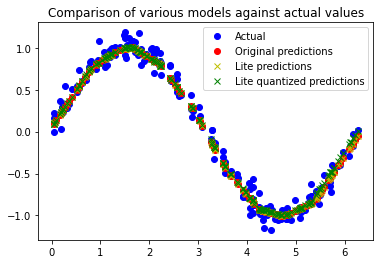

In [ ]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = \
  sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor
  sine_model_predictions.append(
      sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for the quantized model
  sine_model_quantized.set_tensor\
  (sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'yx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
  label='Lite quantized predictions')
plt.legend()
plt.show()

In [ ]:
#check that size is smaller
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("difference %d byts" % difference)

basic model is 2736 bytes
quantized model is 2512 bytes
difference 224 byts


In [ ]:
#convert to binary file
!apt-get -qq install xxd
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
!cat sine_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00,
  0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x60, 0x09, 0x00, 0x00, 0xa8, 0x02, 0x00, 0x00, 0x90, 0x02, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x04, 0x00, 0x08, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00,
  0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74,
  0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65,